# PROBLEM STATEMENT.

#Problem Statement :

Customers send back a substantial part of the products that they purchase online. Return shipping is expensive for online platforms and return orders are said to reach 50% for certain industries and products. Nevertheless, free or inexpensive return shipping has become a customer expectation and de-facto standard in the fierce online competition on clothing, but shops have indirect ways to influence customer purchase behavior. For purchases where return seems likely, a shop could, for example, restrict payment options or display additional marketing communication.

#### Predicting Likelyness of the Customer to return the product

## Importing the Libraries

In [1]:
# DataFrame Libraries
import pandas as pd
import numpy as np

#DataVisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Data Transformation libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_val_score,KFold,learning_curve

#Math Libraries
import scipy.stats as sci

#Metrices Libraries
from sklearn.metrics import accuracy_score,mean_squared_error

#Machine Learning Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


#Date and time Libraries
from datetime import datetime

#Importing the image library
from IPython.display import Image

In [2]:
data = pd.read_csv('TrainingData_V1.csv')

In [3]:
data_new = data.copy()

In [4]:
data_new.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,17-04-1969,1013,23-06-2016,0
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,22-04-1970,1001,15-03-2015,1
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,22-04-1970,1001,15-03-2015,0
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,09-01-1960,1013,17-02-2015,0
4,43,23-06-2016,26-06-2016,394,40,black,44,90.0,30827,Mrs,NaN,1006,09-02-2016,1


In [5]:
data_new.dtypes

order_item_id      int64
order_date        object
delivery_date     object
item_id            int64
item_size         object
item_color        object
brand_id           int64
item_price       float64
user_id            int64
user_title        object
user_dob          object
user_state         int64
user_reg_date     object
return             int64
dtype: object

#### We can observe that There is a date and Time column, Those are some important features to predict if a customer would return the product.
- We can observe that date and time are in 'Object' format.
- An object format will not be recognised during the predictions of a machine learning project.
- we will have to convert the Date and time into an Integer format
- Next step is to Feature Engineer all the date and time columns

# Feature Engineering of Date and Time Columns

In [6]:
# UDF to convert the object format of date time into Date Time Format
def convert_date_time_format(df,t_col):
    df[t_col] = pd.to_datetime(df[t_col],format='%d-%m-%Y')
    pass

In [7]:
convert_date_time_format(data_new,'order_date')
convert_date_time_format(data_new,'delivery_date')
convert_date_time_format(data_new,'user_dob')
convert_date_time_format(data_new,'user_reg_date')

In [8]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79945 entries, 0 to 79944
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_item_id  79945 non-null  int64         
 1   order_date     79945 non-null  datetime64[ns]
 2   delivery_date  72509 non-null  datetime64[ns]
 3   item_id        79945 non-null  int64         
 4   item_size      79945 non-null  object        
 5   item_color     79945 non-null  object        
 6   brand_id       79945 non-null  int64         
 7   item_price     79945 non-null  float64       
 8   user_id        79945 non-null  int64         
 9   user_title     79945 non-null  object        
 10  user_dob       72956 non-null  datetime64[ns]
 11  user_state     79945 non-null  int64         
 12  user_reg_date  79945 non-null  datetime64[ns]
 13  return         79945 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(6), object(3)
memory usage: 8.

#### As you can see that the date and Time columns have been transformed to Datetimeformat.
- Although now it has been transformed, It still cannot be accessed by the predicting Machine learning model.
- Now we will have to convert the date and time into int format
- Here we will be seperating the columns as per date, month and year.

In [9]:
#UDF function to convert the date time into a int format.
def date_time_conversion_year(df,t_col,new_col):
    df[new_col]=df[t_col].dt.year
    pass

In [10]:
#UDF function to convert the date time into a int format.
def date_time_conversion_day(df,t_col,new_col):
    df[new_col]=df[t_col].dt.day
    pass

In [11]:
#UDF function to convert the date time into a int format.
def date_time_conversion_month(df,t_col,new_col):
    df[new_col]=df[t_col].dt.month
    pass

In [12]:
date_time_conversion_year(data_new,'order_date','order_year')
date_time_conversion_month(data_new,'order_date','order_month')
date_time_conversion_day(data_new,'order_date','order_day')
date_time_conversion_year(data_new,'delivery_date','delivery_year')
date_time_conversion_month(data_new,'delivery_date','delivery_month')
date_time_conversion_day(data_new,'delivery_date','delivery_day')
date_time_conversion_year(data_new,'user_dob','user_year')
date_time_conversion_month(data_new,'user_dob','user_month')
date_time_conversion_day(data_new,'user_dob','user_day')
date_time_conversion_year(data_new,'user_reg_date','reg_year')
date_time_conversion_month(data_new,'user_reg_date','reg_month')
date_time_conversion_day(data_new,'user_reg_date','reg_day')

In [13]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79945 entries, 0 to 79944
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_item_id   79945 non-null  int64         
 1   order_date      79945 non-null  datetime64[ns]
 2   delivery_date   72509 non-null  datetime64[ns]
 3   item_id         79945 non-null  int64         
 4   item_size       79945 non-null  object        
 5   item_color      79945 non-null  object        
 6   brand_id        79945 non-null  int64         
 7   item_price      79945 non-null  float64       
 8   user_id         79945 non-null  int64         
 9   user_title      79945 non-null  object        
 10  user_dob        72956 non-null  datetime64[ns]
 11  user_state      79945 non-null  int64         
 12  user_reg_date   79945 non-null  datetime64[ns]
 13  return          79945 non-null  int64         
 14  order_year      79945 non-null  int64         
 15  or

### Now we will be Dropping the columns which are repeated.
- Order Date
- Delivery Date
- User DOB
- User Reg Date

In [14]:
# UDF Function to drop the Columns
def dropp(df,t_col):
    df.drop(t_col,axis=1,inplace=True)
    pass

In [15]:
dropp(data_new,'order_date')
dropp(data_new,'delivery_date')
dropp(data_new,'user_dob')
dropp(data_new,'user_reg_date')

In [16]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79945 entries, 0 to 79944
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_item_id   79945 non-null  int64  
 1   item_id         79945 non-null  int64  
 2   item_size       79945 non-null  object 
 3   item_color      79945 non-null  object 
 4   brand_id        79945 non-null  int64  
 5   item_price      79945 non-null  float64
 6   user_id         79945 non-null  int64  
 7   user_title      79945 non-null  object 
 8   user_state      79945 non-null  int64  
 9   return          79945 non-null  int64  
 10  order_year      79945 non-null  int64  
 11  order_month     79945 non-null  int64  
 12  order_day       79945 non-null  int64  
 13  delivery_year   72509 non-null  float64
 14  delivery_month  72509 non-null  float64
 15  delivery_day    72509 non-null  float64
 16  user_year       72956 non-null  float64
 17  user_month      72956 non-null 

#### We can also see that The Item size coulmn needs to be treated.

In [17]:
#Trying to find all the unique values in the column
myuniquelist = list(set(data_new['item_size']))

In [18]:
#These are the list of unique values which are present in the column 'item_size'
print(myuniquelist)

['6+', '12', 'm', '1', '38+', '27', '3634', '100', '90', '2+', '3', '3432', '8', '23', '128', '30', '33', '34', '84', '3332', '45+', '44', '39+', '48', '152', '7+', '80', '7', '3834', '36+', '140', '4', '4034', '11+', '39', '22', '40+', '6', '41+', 'xxl', '50', '9', '36', '11', '28', 'unsized', '5', '29', '3832', '18', 'xxxl', '3132', '52', '176', '43', '49', '37', '56', 'xs', '14', 'l', '25', '105', '54', '43+', '45', '21', '37+', '12+', '46+', '58', '32', '116', '104', '3+', '24', 's', '44+', '19', '42+', '13', '41', '42', '10', '31', '46', '9+', '3632', '38', '164', '47', '20', '5+', '8+', '10+', '26', '35', '40', '4032', '2', '4+', 'xl']


### Points to Note
- The datapoints are currently a object.
- We need to Transform the data points into a readable format for machine learning models.
- For this case we are considering the Size chart below to transform the data.

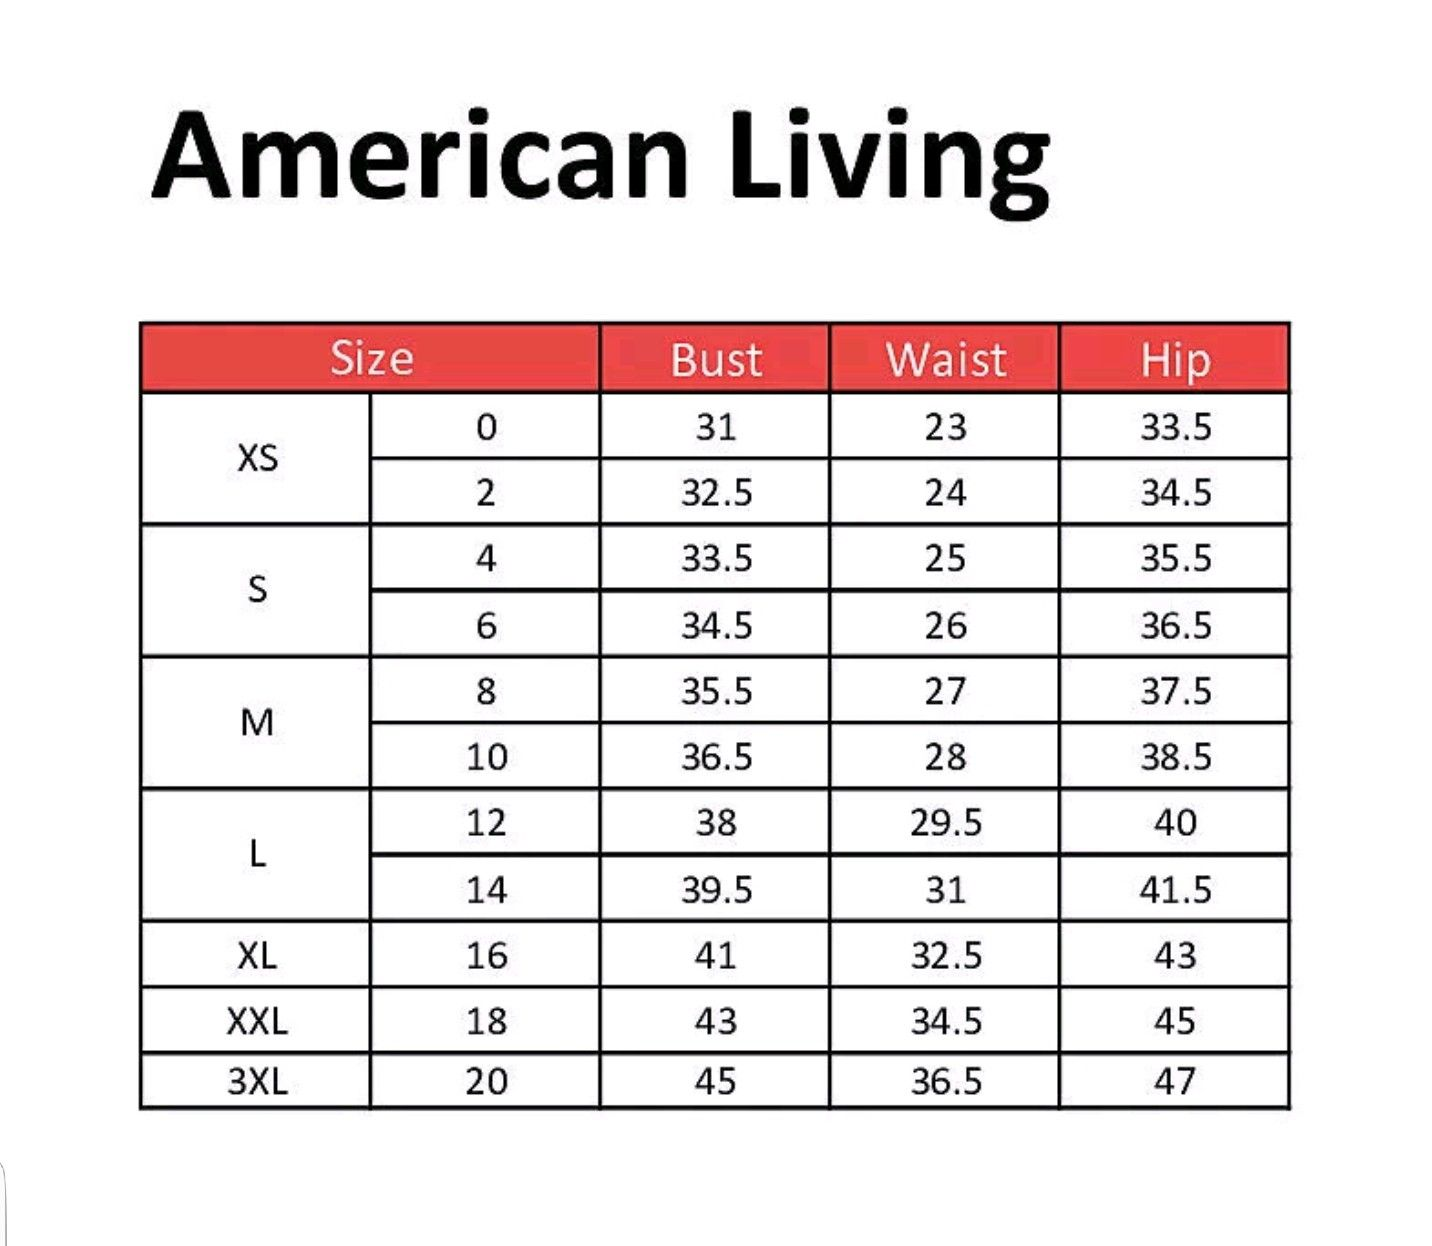

In [19]:
#For this particular case, we have considered this particular size chart
Image("be894acb35daad6d4d77aeea4aa3f08b.jpg", height=300, width=500)

In [20]:
#Here we are using mapping function to map the data points with a specific value.
data_new['item_size'] = data_new['item_size'].map({'l':31, 'xs':24, 'unsized':0,'xl':33,'m':28,'xxl':35,'xxxl':38,'s':26,'40+':40,'6+':6,'9+':9,'39+':39,'41+':41,'37+':37,'5+':5,'4+':4,'45+':45,'44+':44,'43+':43,'46+':46,'7+':7,'42+':42,'10+':10,'2+':2,'11+':11,'38+':38,'36+':36,'12+':12,'3+':3,'8+':8})

In [21]:
# We can see that there are some missing values.
data_new['item_size'].isnull().sum()/(len(data_new))*100

45.531302770654825

In [22]:
#Checking the Count.
data_new['item_size'].value_counts()

31.0    9861
33.0    8707
28.0    8200
35.0    7208
0.0     4132
26.0    3185
6.0      346
7.0      269
8.0      196
38.0     192
5.0      185
39.0     163
9.0      161
40.0     156
10.0     140
42.0     106
41.0      80
4.0       77
37.0      62
24.0      23
11.0      21
36.0      18
43.0      16
46.0      13
3.0       11
44.0       8
45.0       6
2.0        2
12.0       1
Name: item_size, dtype: int64

In [23]:
#Since we can see that there is skewness present in the column, we replace the missing values by median, if it was a normal distribution then we would have replaced the missing values by mean
data_new['item_size'].skew()

-1.9369804002015054

In [24]:
#Replacing all the missing values by mean:
data_new['item_size'] = data_new['item_size'].fillna(data_new['item_size'].median())

In [25]:
#We can see that the null values have been replaced.
data_new['item_size'].isnull().sum()

0

In [26]:
data_new.head()

,order_item_id,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,return,...,order_day,delivery_year,delivery_month,delivery_day,user_year,user_month,user_day,reg_year,reg_month,reg_day
0,1,643,31.0,navy,30,49.9,30822,Mrs,1013,0,...,22,2016.0,6.0,27.0,1969.0,4.0,17.0,2016,6,23
1,10,195,35.0,grey,46,19.9,30823,Mrs,1001,1,...,22,2016.0,6.0,27.0,1970.0,4.0,22.0,2015,3,15
2,11,25,35.0,grey,5,79.9,30823,Mrs,1001,0,...,22,2016.0,7.0,5.0,1970.0,4.0,22.0,2015,3,15
3,32,173,28.0,brown,20,19.9,17234,Mrs,1013,0,...,23,2016.0,6.0,26.0,1960.0,1.0,9.0,2015,2,17
4,43,394,31.0,black,44,90.0,30827,Mrs,1006,1,...,23,2016.0,6.0,26.0,NaN,NaN,NaN,2016,2,9


### Transforming Categorical data point into int using LabelEncoding - Feature Engineering

In [27]:
def label_encoding(df,t_col):
    LaEn = LabelEncoder()
    df[t_col] = LaEn.fit_transform(df[t_col])
    pass

In [28]:
label_encoding(data_new,'item_color')
label_encoding(data_new,'user_title')

In [29]:
data_new.head()

,order_item_id,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,return,...,order_day,delivery_year,delivery_month,delivery_day,user_year,user_month,user_day,reg_year,reg_month,reg_day
0,1,643,31.0,60,30,49.9,30822,3,1013,0,...,22,2016.0,6.0,27.0,1969.0,4.0,17.0,2016,6,23
1,10,195,35.0,47,46,19.9,30823,3,1001,1,...,22,2016.0,6.0,27.0,1970.0,4.0,22.0,2015,3,15
2,11,25,35.0,47,5,79.9,30823,3,1001,0,...,22,2016.0,7.0,5.0,1970.0,4.0,22.0,2015,3,15
3,32,173,28.0,22,20,19.9,17234,3,1013,0,...,23,2016.0,6.0,26.0,1960.0,1.0,9.0,2015,2,17
4,43,394,31.0,18,44,90.0,30827,3,1006,1,...,23,2016.0,6.0,26.0,NaN,NaN,NaN,2016,2,9


In [30]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79945 entries, 0 to 79944
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_item_id   79945 non-null  int64  
 1   item_id         79945 non-null  int64  
 2   item_size       79945 non-null  float64
 3   item_color      79945 non-null  int32  
 4   brand_id        79945 non-null  int64  
 5   item_price      79945 non-null  float64
 6   user_id         79945 non-null  int64  
 7   user_title      79945 non-null  int32  
 8   user_state      79945 non-null  int64  
 9   return          79945 non-null  int64  
 10  order_year      79945 non-null  int64  
 11  order_month     79945 non-null  int64  
 12  order_day       79945 non-null  int64  
 13  delivery_year   72509 non-null  float64
 14  delivery_month  72509 non-null  float64
 15  delivery_day    72509 non-null  float64
 16  user_year       72956 non-null  float64
 17  user_month      72956 non-null 

#### Now that we have Converted the data points into a readable format for machine learning model, we will start with the analysis

## STEP - 1 - Identifying the Missing values in the dataset

In [31]:
#Trying to understand the percentage of missing value present.
data_new.isnull().sum()/(len(data_new))*100

order_item_id     0.000000
item_id           0.000000
item_size         0.000000
item_color        0.000000
brand_id          0.000000
item_price        0.000000
user_id           0.000000
user_title        0.000000
user_state        0.000000
return            0.000000
order_year        0.000000
order_month       0.000000
order_day         0.000000
delivery_year     9.301395
delivery_month    9.301395
delivery_day      9.301395
user_year         8.742260
user_month        8.742260
user_day          8.742260
reg_year          0.000000
reg_month         0.000000
reg_day           0.000000
dtype: float64

<AxesSubplot:>

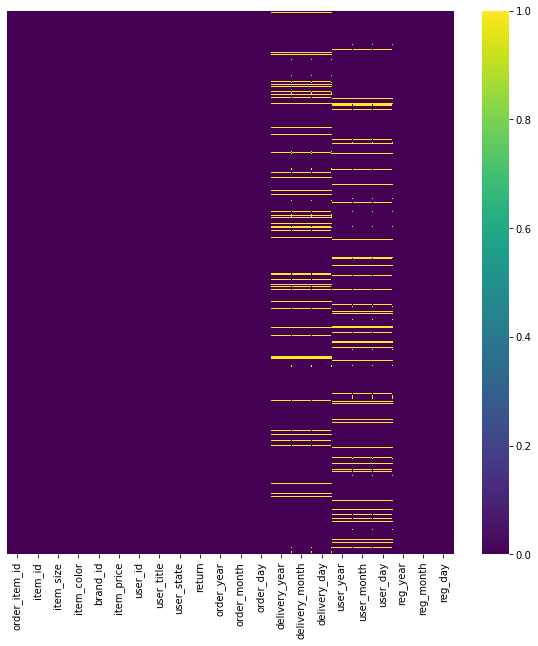

In [32]:
# Finding the Missing values
plt.figure(figsize=(10,10))
sns.heatmap(data_new.isnull(),yticklabels=False,cmap='viridis')

### From the Above we can understand that there are missing values in the particular columns
- Delivery year
- Delivery Month
- Delivery Day
- User year dob
- User year Month
- User year Day

In [33]:
def skew(df,t_col):
    print(df[t_col].skew())

In [34]:
skew(data_new,'delivery_year')
skew(data_new,'delivery_month')
skew(data_new,'delivery_day')
skew(data_new,'user_year')
skew(data_new,'user_month')
skew(data_new,'user_day')

-9.095126444375337
0.9232649898751621
0.12053858188456183
-2.211239120365757
0.010009978115209494
-0.02715058364740885


### Filling the Missing values
1. Skewness is Present = Median Teatment (delivery_year,user_year)
2. Skewness not Present = Mean Treatment (delivery_month,delivery_day,user_month,user_day)

In [35]:
#Replacing all the missing values by median and mean:
data_new['delivery_year'] = data_new['delivery_year'].fillna(data_new['delivery_year'].median())
data_new['delivery_month'] = data_new['delivery_month'].fillna(data_new['delivery_month'].mean())
data_new['delivery_day'] = data_new['delivery_day'].fillna(data_new['delivery_day'].mean())
data_new['user_year']= data_new['user_year'].fillna(data_new['user_year'].median())
data_new['user_month']= data_new['user_month'].fillna(data_new['user_month'].mean())
data_new['user_day']= data_new['user_day'].fillna(data_new['user_day'].mean())

<AxesSubplot:>

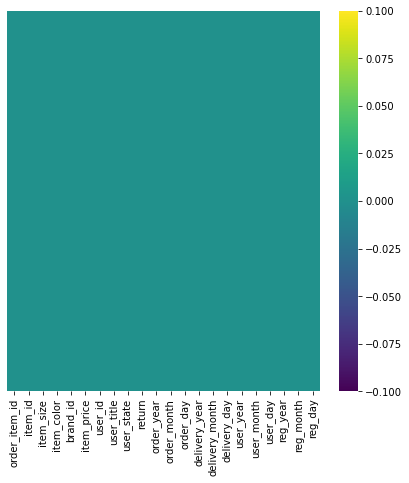

In [36]:
# Re-Checking for missing values
plt.figure(figsize=(7,7))
sns.heatmap(data_new.isnull(),yticklabels=False,cmap='viridis')

## Analysis
- All the missing values have been treated

In [37]:
data_new = data_new[['order_item_id','item_id','item_size','item_color','brand_id','item_price','user_id','user_title','user_state','order_year','order_month','order_day','delivery_year','delivery_month','delivery_day','user_year','user_month','user_day','reg_year','reg_month','reg_day','return']]

# Creating a EDA REPORT (Exploratory Data Analysis)

In [38]:
def describe(my_df):
    
    #creating an empty list for columns and appending everything into that
    cols=[]
    for i in my_df.columns:
        if my_df[i].dtype != object:
            cols.append(i)
    
    
    #Now we are describing which needs to be set as columns and what needs to be set as index in Dataframe
    result = pd.DataFrame(columns= cols,index= ['DataType','Count','Min', 'Q1', 'Q2', 'Mean', 'Q3', 'Max', 'Std','Skew','Kurt','Range','IQR','Skewness comment','Outlier comment','Kurtosis comment'])
    
    for i in result.columns:
        result.loc['DataType',i] = my_df[i].dtype
        result.loc['Count',i] = my_df[i].count()
        result.loc['Min',i] = my_df[i].min()
        result.loc['Q1',i] = my_df[i].quantile(0.25)
        result.loc['Q2',i] = my_df[i].quantile(0.5)
        result.loc['Mean',i] = round(my_df[i].mean(),2)
        result.loc['Q3',i] = my_df[i].quantile(0.75)
        result.loc['Max',i] = my_df[i].max()
        result.loc['Std',i] = round(my_df[i].std(),2)
        result.loc['Skew',i] = round(my_df[i].skew(),2)
        result.loc['Kurt',i] = round(my_df[i].kurt(),2)
        result.loc['Range',i] = my_df[i].max() - my_df[i].min()
        result.loc['IQR',i] = my_df[i].quantile(0.75) - my_df[i].quantile(0.25)
        
        #Adding comments for skewness
        if result.loc['Skew',i] <= -1:
            sk_label = "Highly negatively skewed"
        elif -1 < result.loc['Skew',i] <= -0.5:
            sk_label = "Moderately negatively skewed"
        elif -0.5 < result.loc['Skew',i] < 0:
            sk_label = "Approx normal distribution(-ve)"
        elif 0 <= result.loc['Skew',i] < 0.5:
            sk_label = "Approx normal distribution(+ve)"
        elif 0.5 <= result.loc['Skew',i] < 1:
            sk_label = "Moderately positively skewed"
        elif result.loc['Skew',i] >= 1:
            sk_label = "Highly positively skewed"
        else:
            sk_label = 'Error'
        result.loc['Skewness comment', i] = sk_label
        
    # Adding comments for outliers
        upperlimit = result.loc['Q3',i] + (1.5 * result.loc['IQR',i])
        lowerlimit = result.loc['Q1',i] - (1.5 * result.loc['IQR',i])
    
        if len([x for x in my_df[i] if x < lowerlimit or x > upperlimit]) > 0:
            outlier_label = "Have outliers"
        else:
            outlier_label = "No outliers"
        result.loc['Outlier comment', i] = outlier_label
        
    # Adding kurtosis comment
        if result.loc['Kurt',i] <= -1:
            kt_label = "Highly platykurtic curve"
        elif -1 < result.loc['Kurt',i] <= -0.5:
            kt_label = "Moderately platykurtic curve"
        elif -0.5 < result.loc['Kurt',i] < 0.5:
            kt_label = "Mezokurtic curve"
        elif 0.5 <= result.loc['Kurt',i] < 1:
            kt_label = "Moderately leptokurtic curve"
        elif result.loc['Kurt',i] >= 1:
            kt_label = "Highly leptokurtic curve"
        else:
            kt_label = 'Error'
        result.loc['Kurtosis comment', i] = kt_label
    display(result)

In [39]:
describe(data_new)

,order_item_id,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,order_year,...,delivery_year,delivery_month,delivery_day,user_year,user_month,user_day,reg_year,reg_month,reg_day,return
DataType,int64,int64,float64,int32,int64,float64,int64,int32,int64,int64,...,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64
Count,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,...,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945
Min,1,1,0.0,0,1,0.0,9,0,1001,2016,...,1994.0,1.0,1.0,1900.0,1.0,1.0,2015,1,1,0
Q1,25133.0,214.0,31.0,18.0,5.0,29.9,14943.0,3.0,1002.0,2016.0,...,2016.0,7.0,7.0,1959.0,4.0,9.0,2015.0,2.0,12.0,0.0
Q2,49985.0,812.0,31.0,34.0,25.0,49.9,31189.0,3.0,1008.0,2016.0,...,2016.0,8.0,15.472493,1965.0,6.537338,15.831159,2015.0,4.0,17.0,0.0
Mean,50056.6,924.28,29.13,38.49,30.1,65.09,27185.71,2.95,1007.27,2016.0,...,2015.77,7.79,15.47,1963.89,6.54,15.83,2015.47,4.76,16.34,0.46
Q3,75118.0,1582.0,31.0,62.0,44.0,79.9,38931.0,3.0,1010.0,2016.0,...,2016.0,8.0,24.0,1969.0,9.0,22.0,2016.0,7.0,20.0,1.0
Max,100000,2241,46.0,76,138,999.0,48241,4,1016,2016,...,2017.0,12.0,31.0,2011.0,12.0,31.0,2016,12,31,1
Std,28872.6,702.58,7.81,22.29,28.16,47.73,14063.26,0.26,4.28,0.0,...,2.25,1.02,9.16,10.8,3.37,8.35,0.5,2.96,7.45,0.5
Skew,0.0,0.08,-3.01,0.25,1.26,1.79,-0.38,-5.65,-0.0,0,...,-9.57,0.97,0.13,-2.34,0.01,-0.03,0.11,0.53,-0.16,0.17


In [40]:
def histogram(df):
    for col in df.columns:
        if col!='charges in INR':
            plt.figure(figsize=(10,10))
            sns.distplot(df[col]).set_title(f'{col} Histogram')

In [41]:
def Boxplot(df):
    for col in df.columns:
        if col!='charges in INR':
            plt.figure(figsize=(10,10))
            sns.boxplot(df[col]).set_title(f'{col} Boxplot')

C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

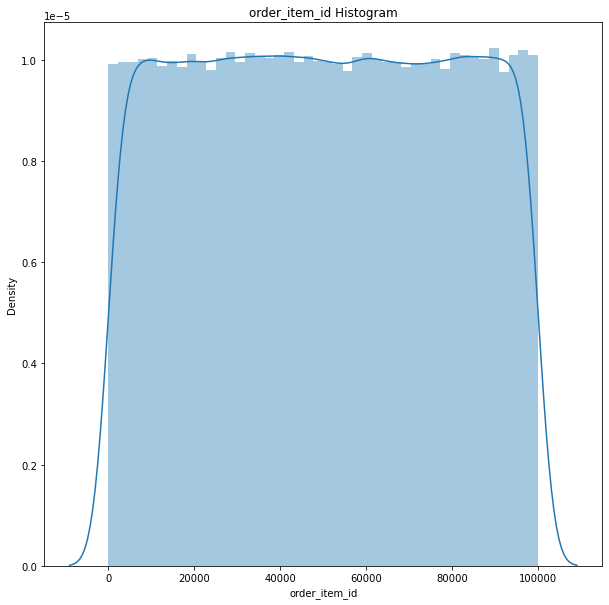

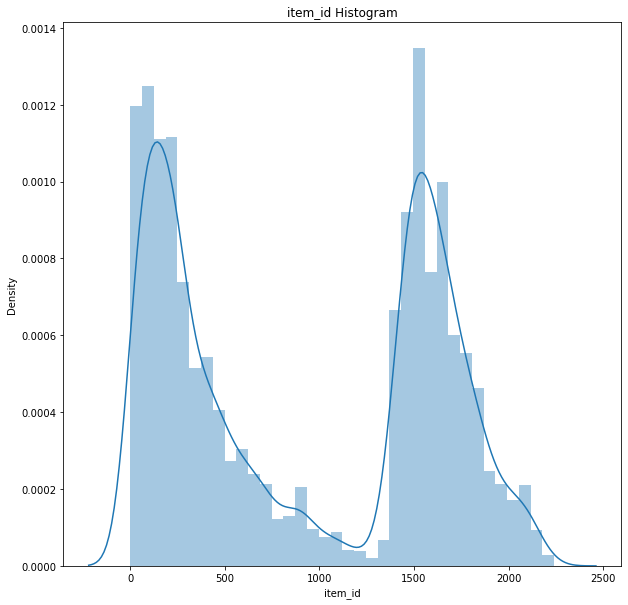

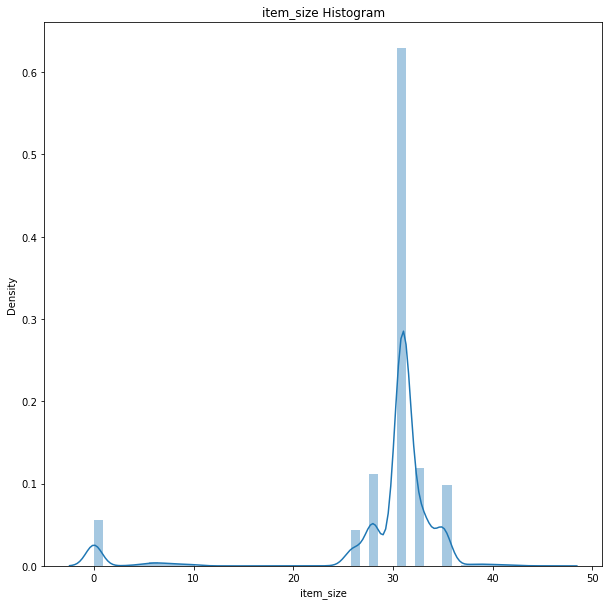

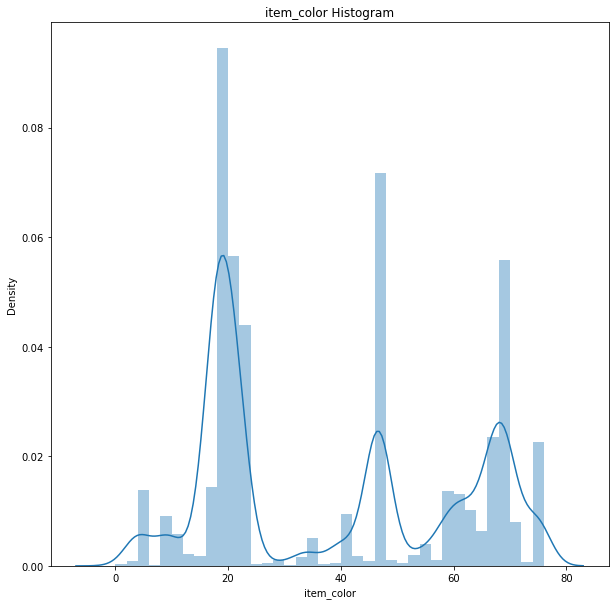

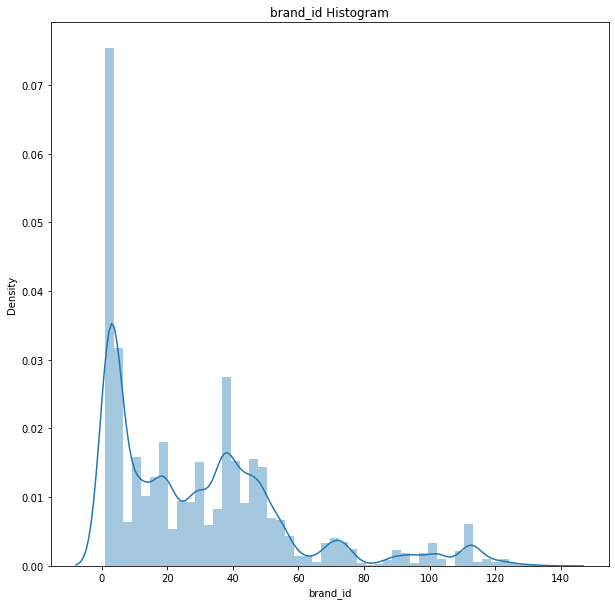

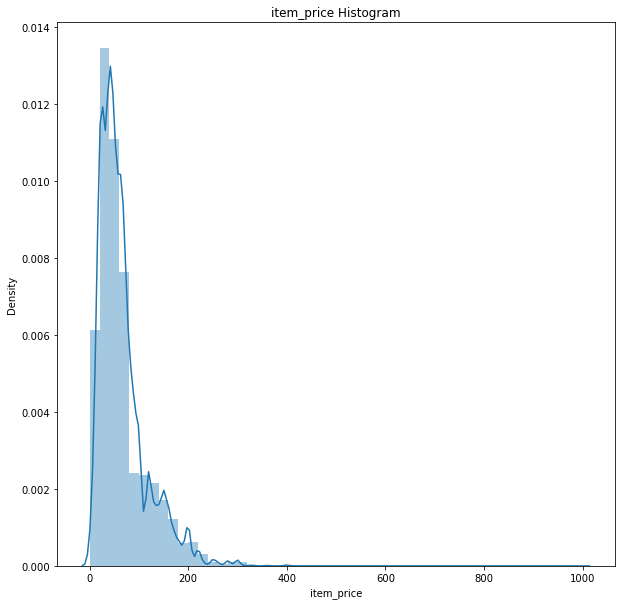

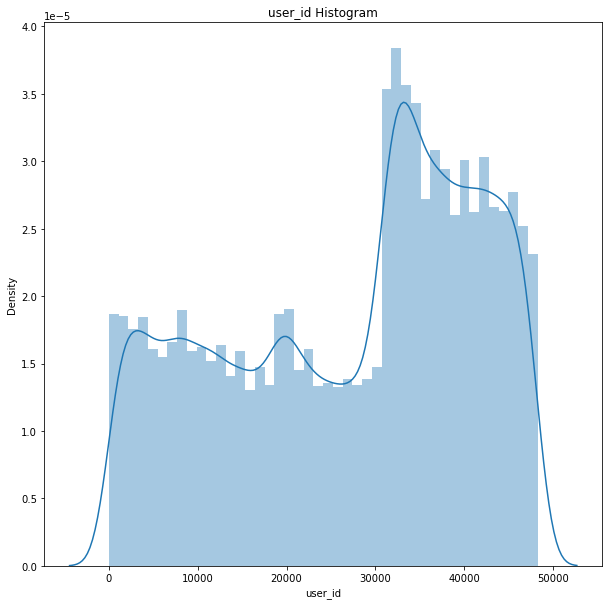

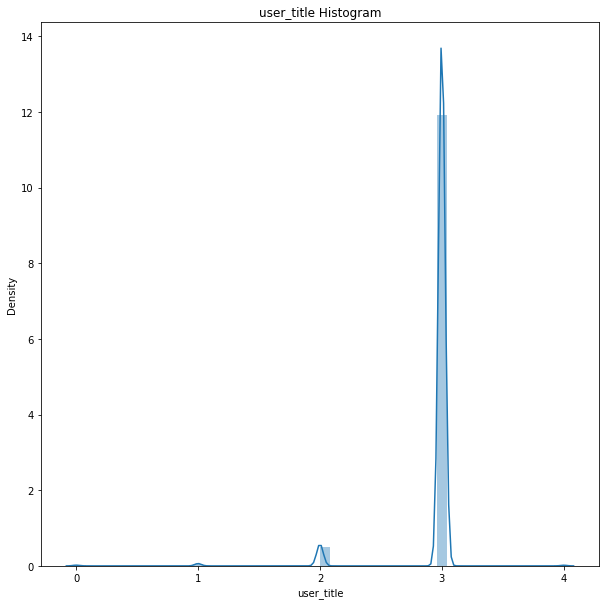

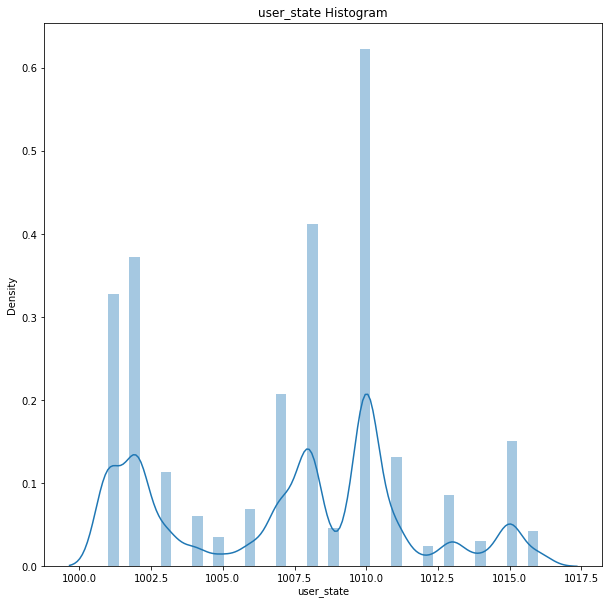

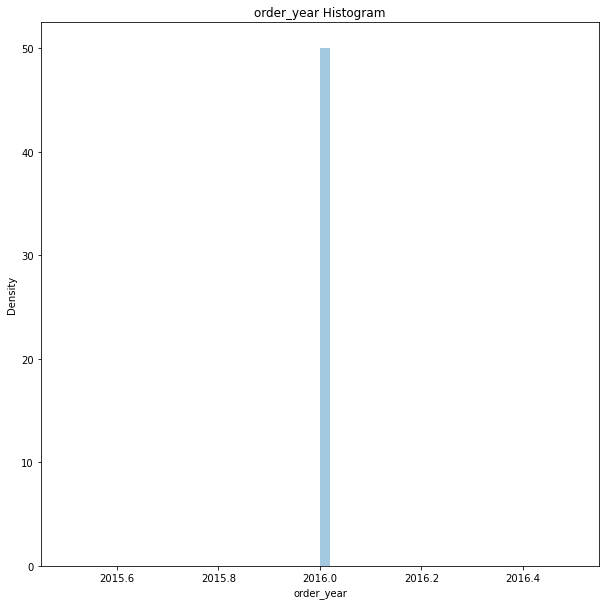

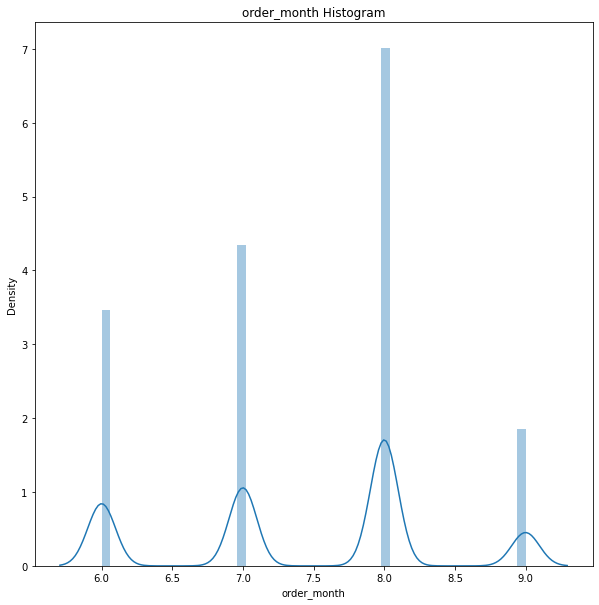

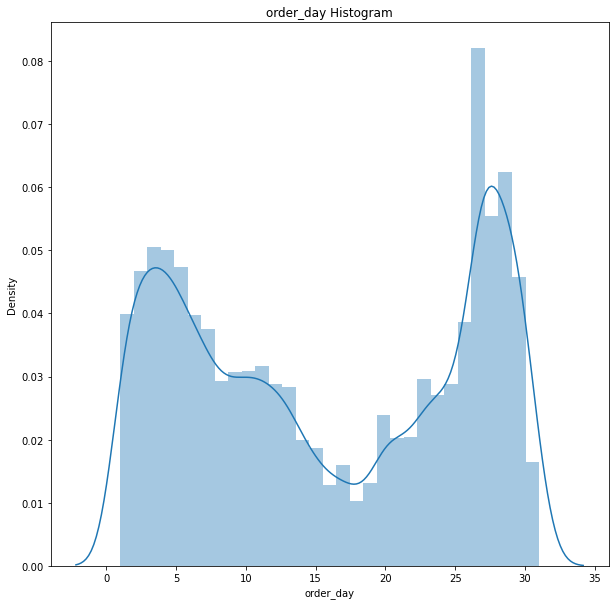

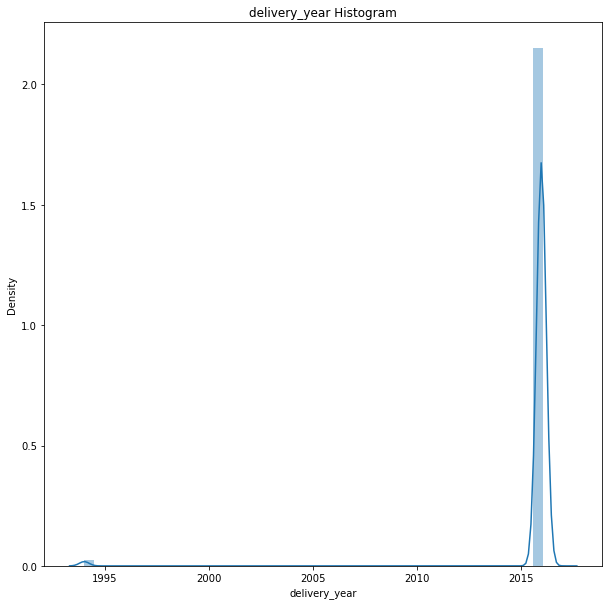

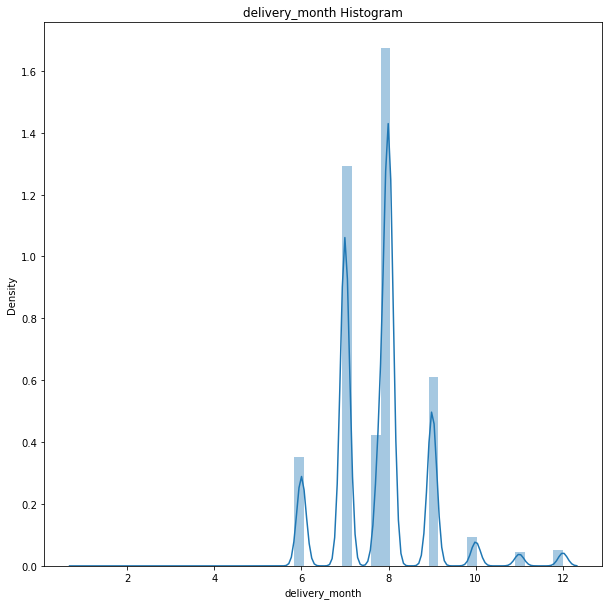

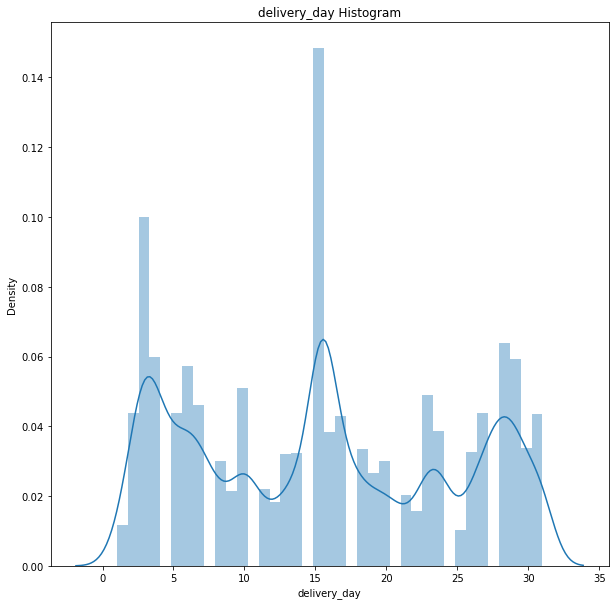

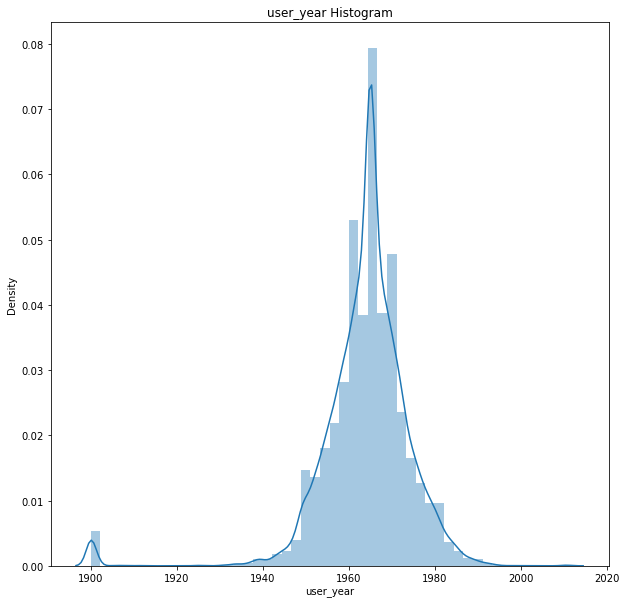

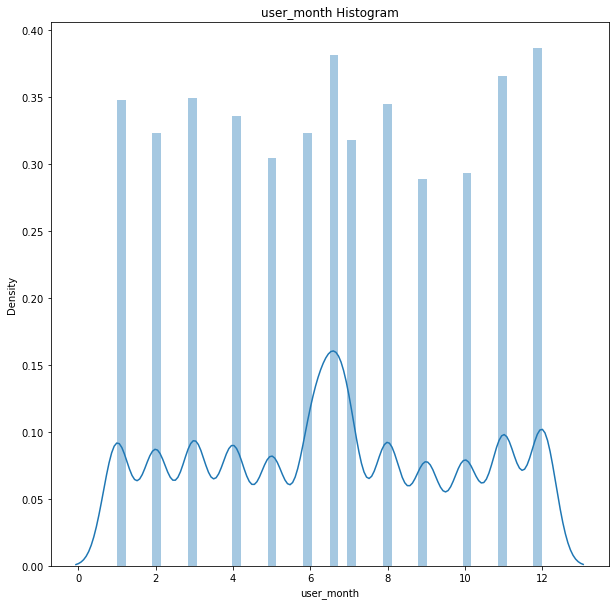

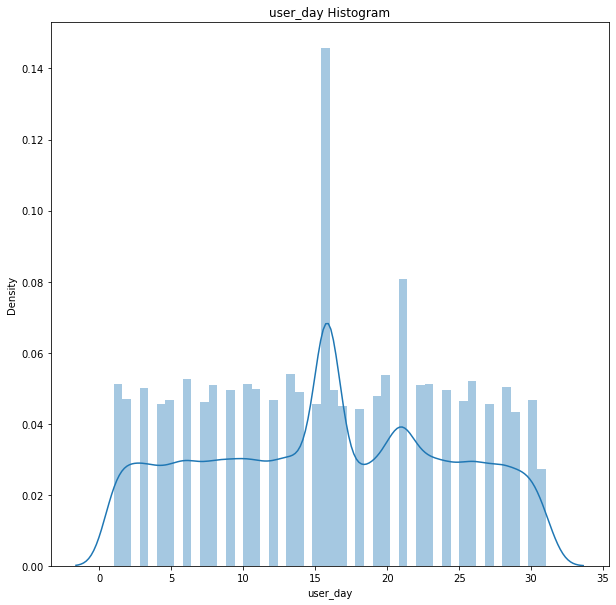

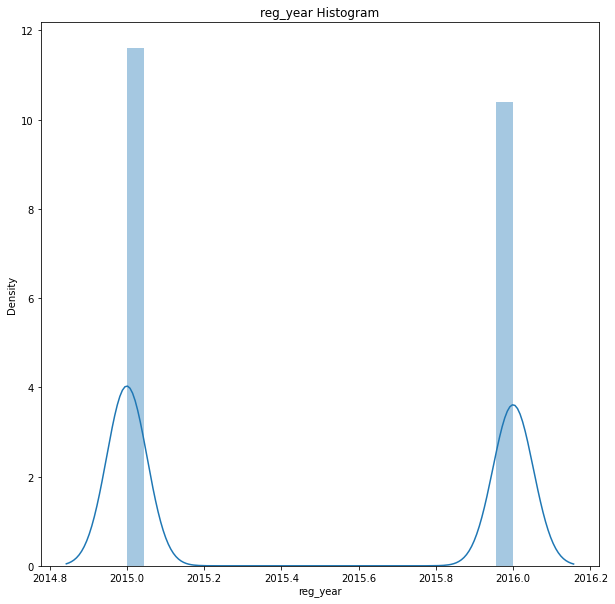

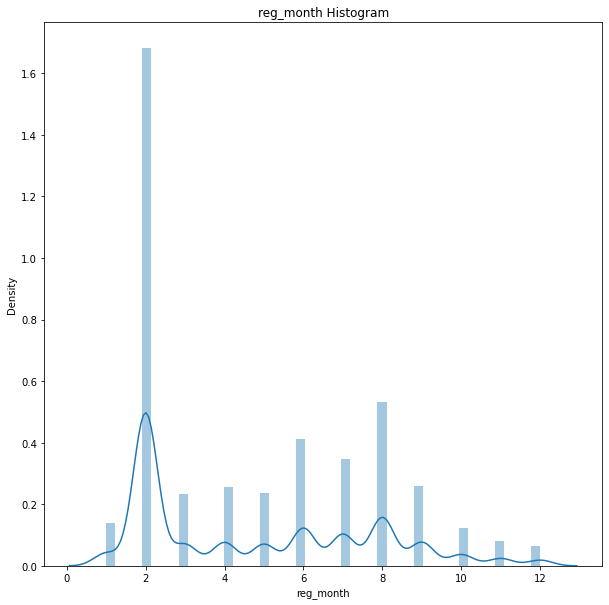

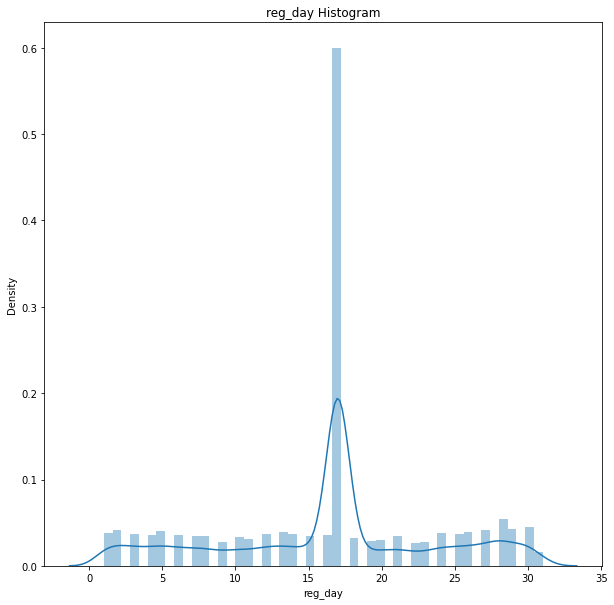

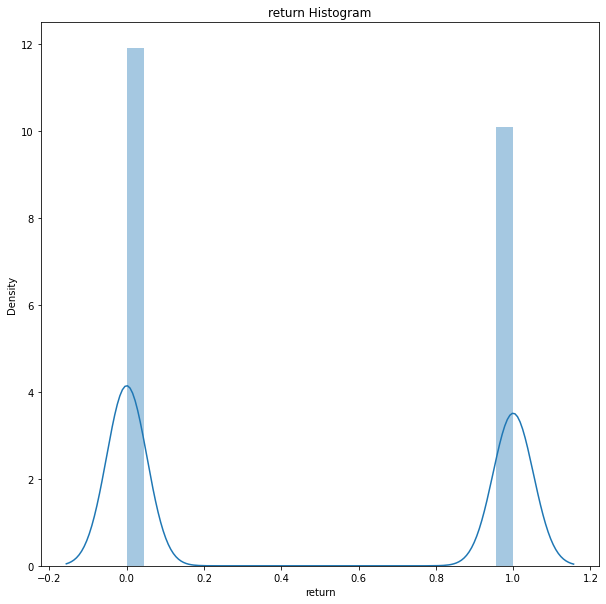

In [42]:
histogram(data_new)

C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\li

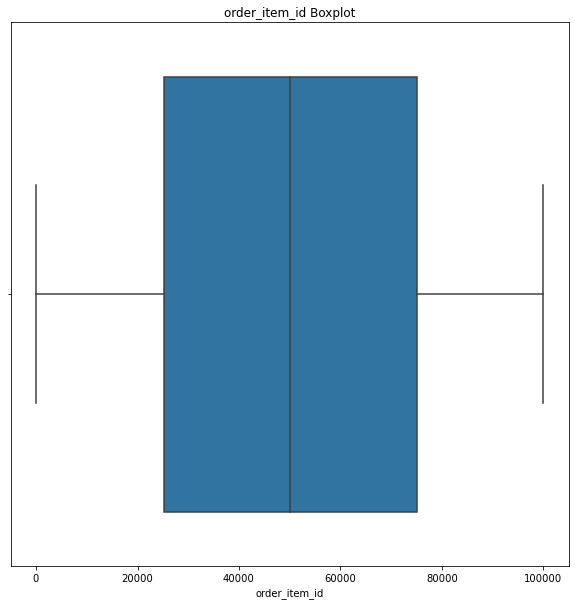

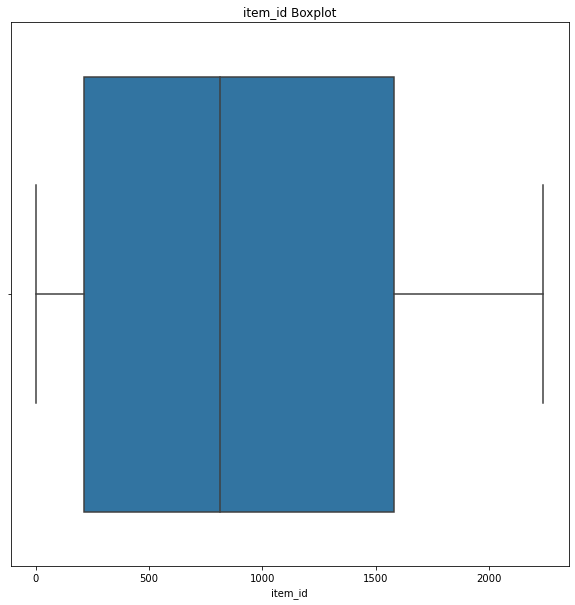

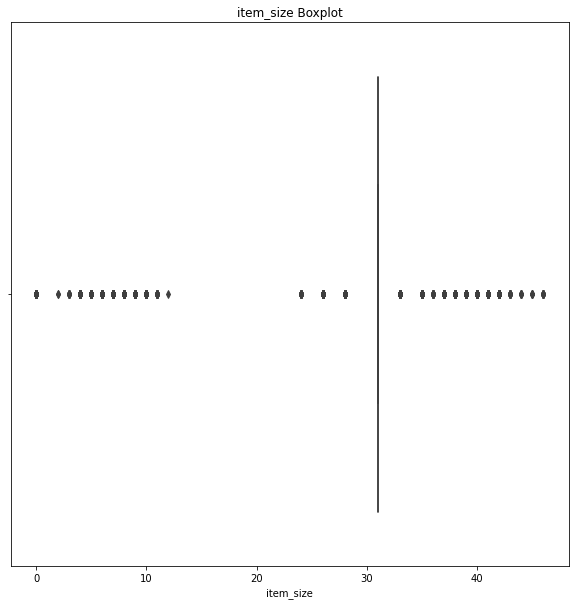

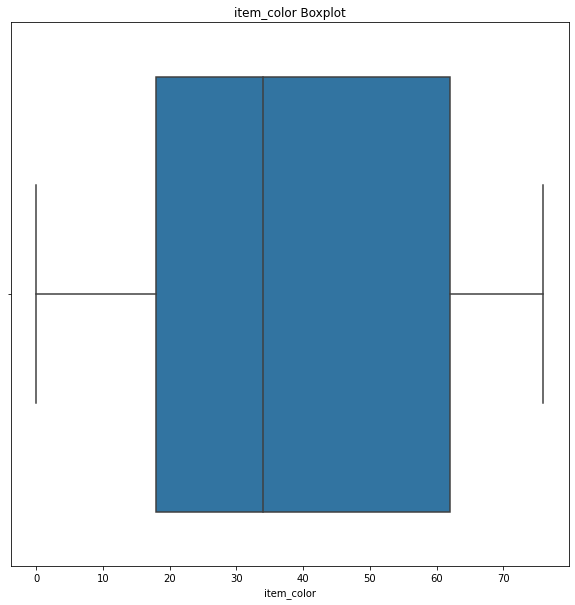

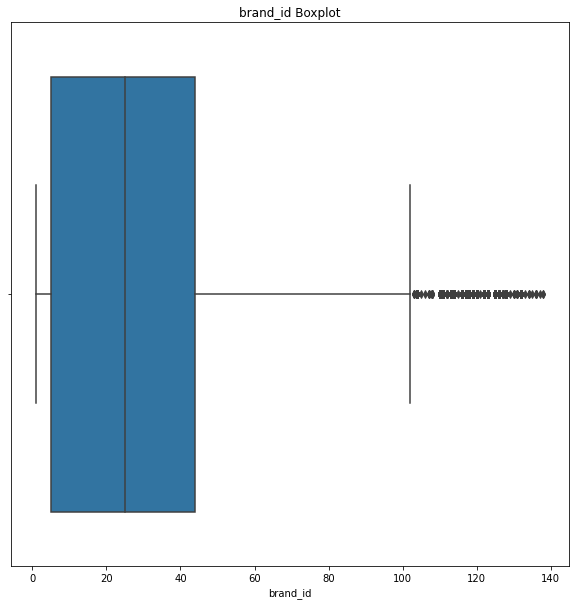

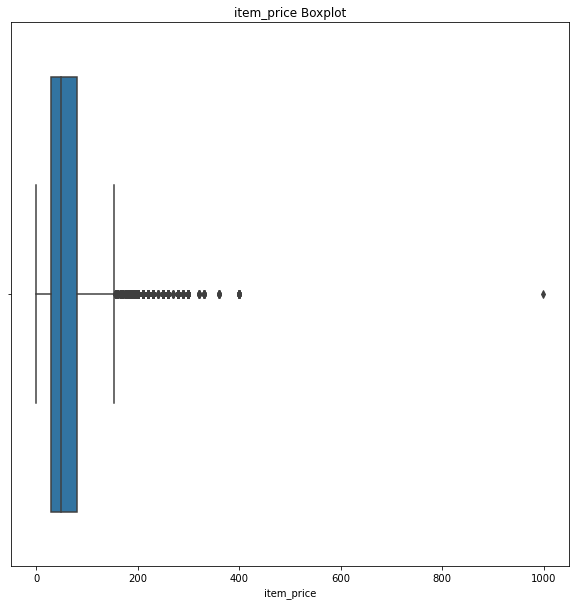

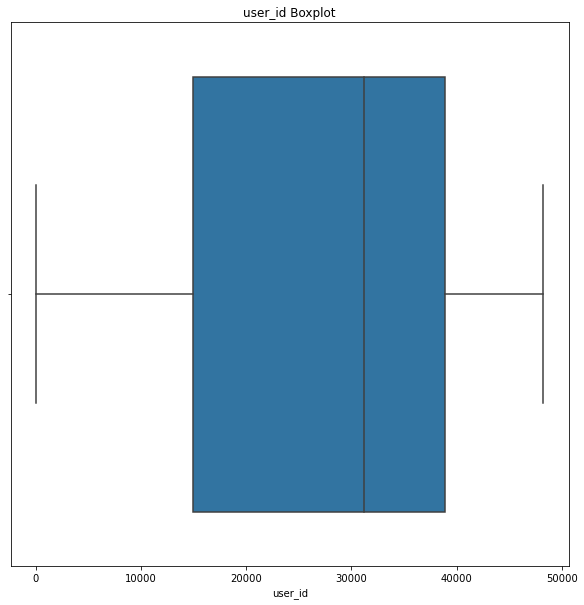

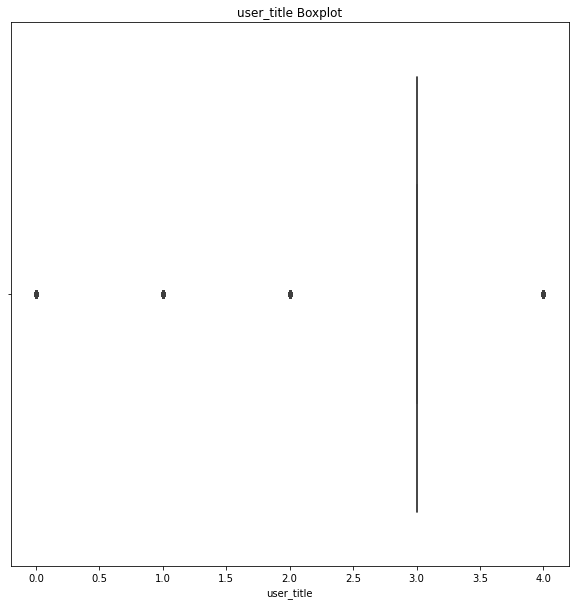

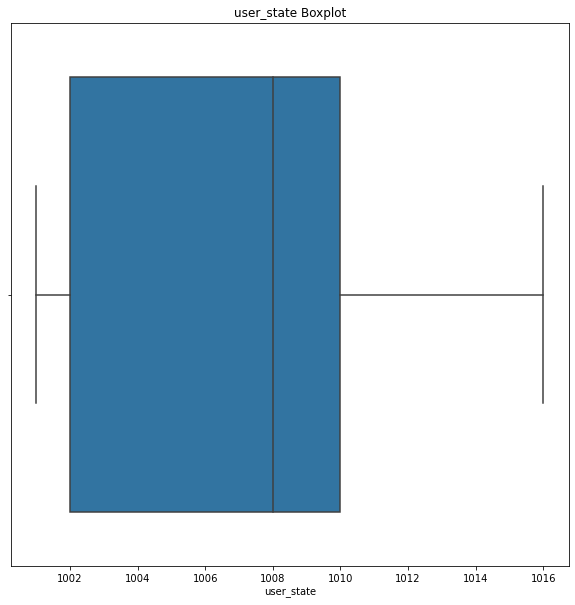

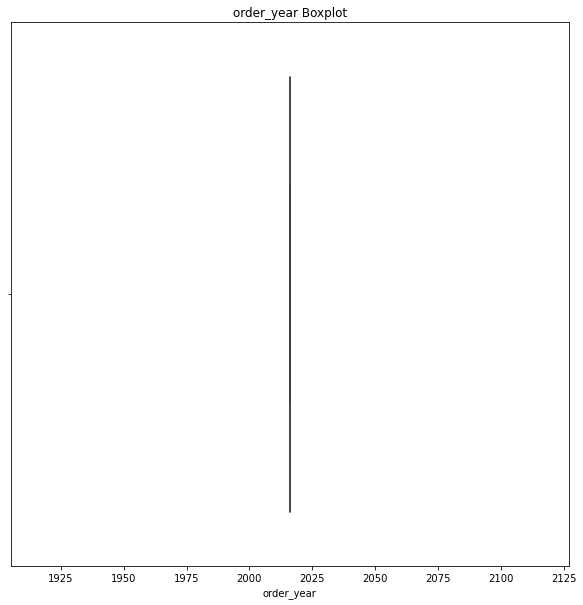

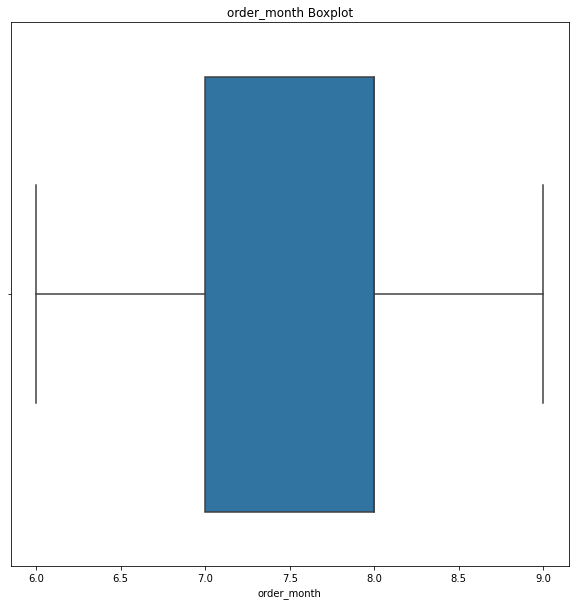

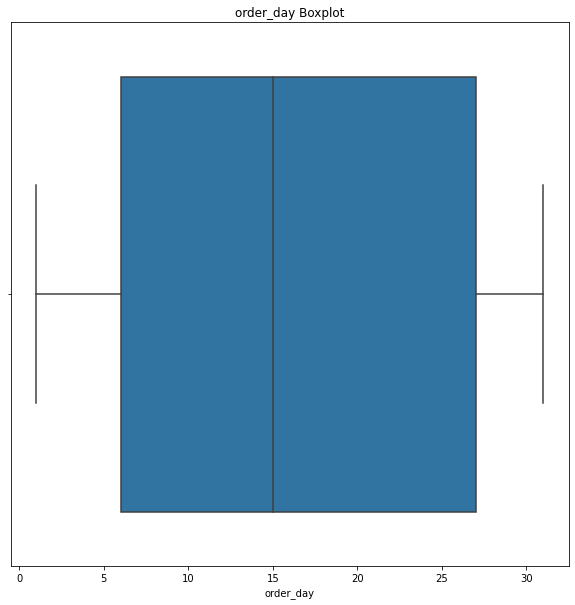

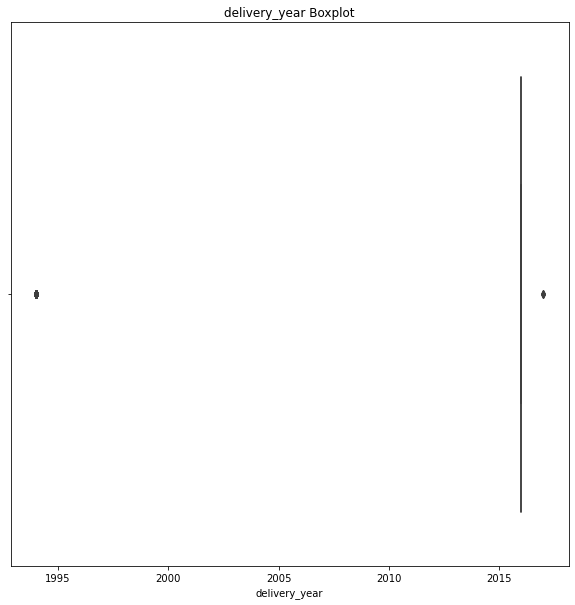

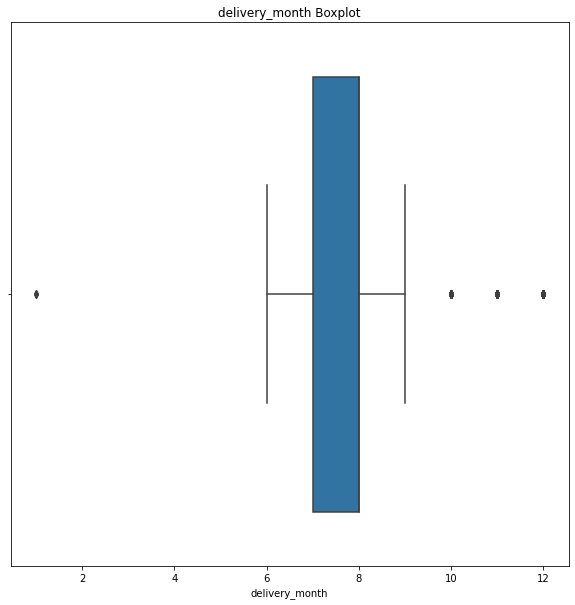

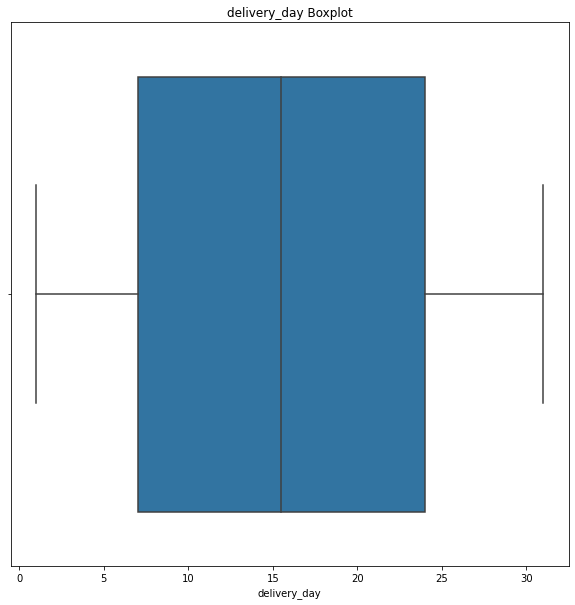

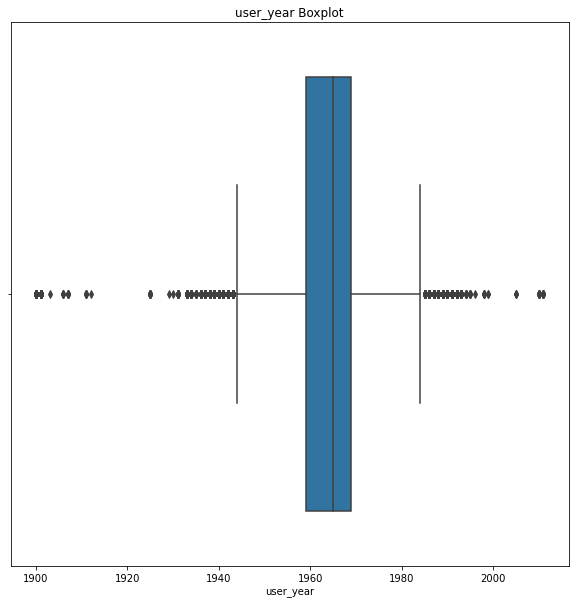

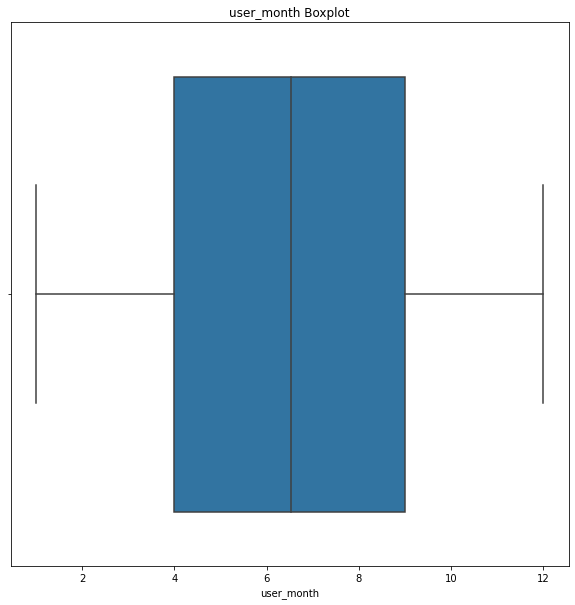

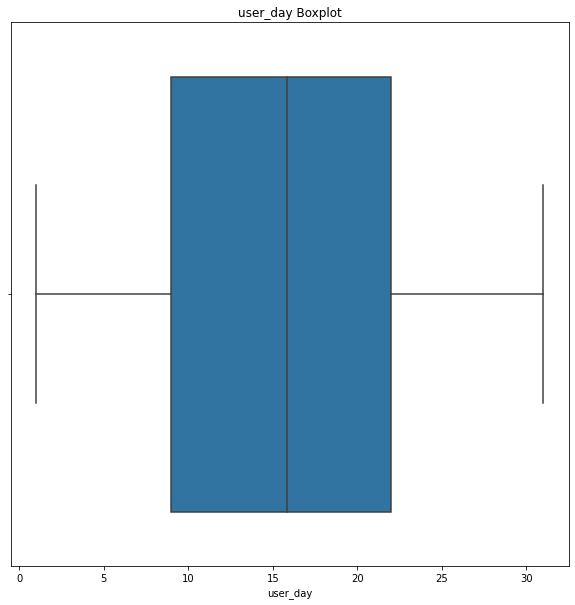

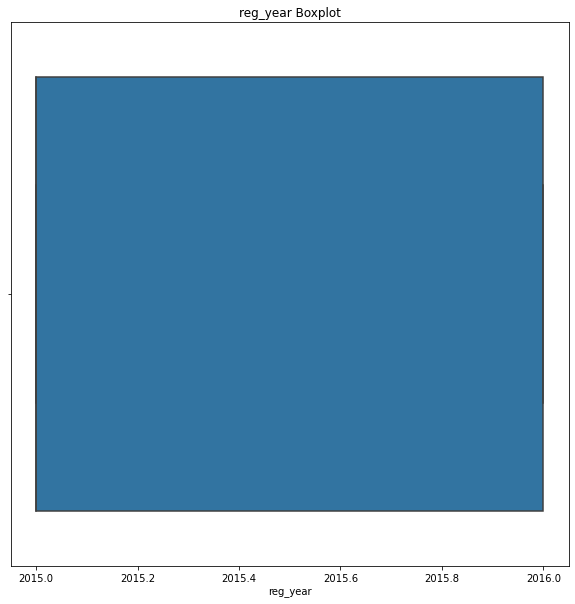

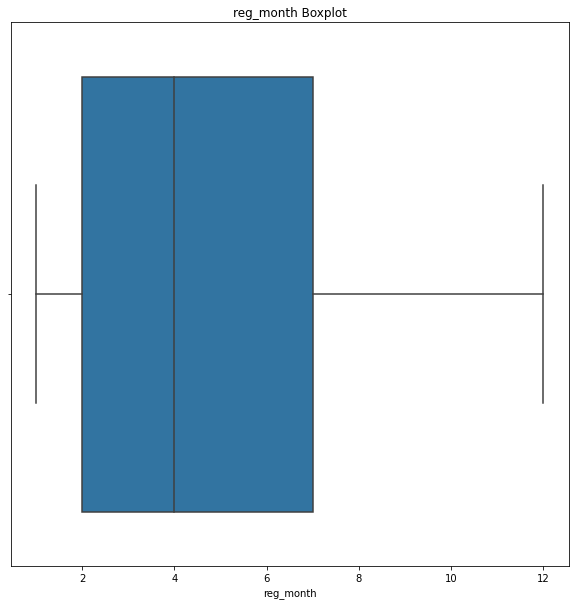

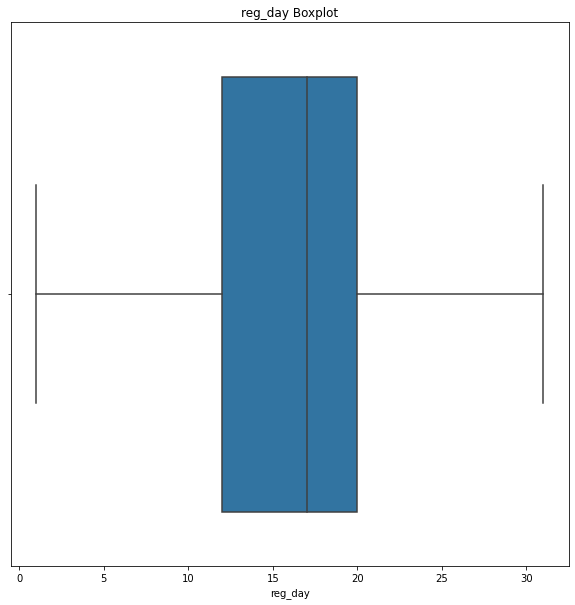

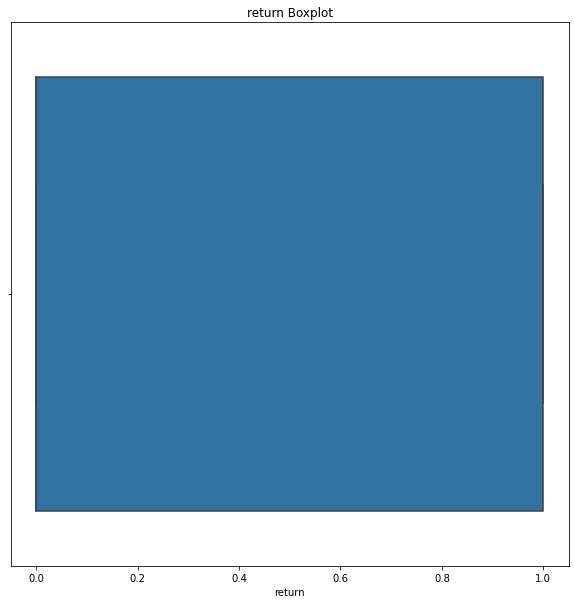

In [43]:
Boxplot(data_new)

## ANALYSIS FINDINGS
1. The Skewness is above +1 or -1 in the particular features
- item_size
- brand_id
- item_price
- user_title
- delivery_year
- user_year
2. There are no Missing Values as the counts are same in all the features

#### Next Step - We need to treat the Skewness, There are various ways, but always we will have to perform Feature Transformation first
#Lets Start with Square Root Transformation

In [44]:
data_new_sqrt = data_new.copy()

In [45]:
def sqrt(df,t_col):
    df[t_col]= np.sqrt(df[t_col])
    pass

In [46]:
sqrt(data_new_sqrt,'item_size')
sqrt(data_new_sqrt,'brand_id')
sqrt(data_new_sqrt,'item_price')
sqrt(data_new_sqrt,'user_title')
sqrt(data_new_sqrt,'delivery_year')
sqrt(data_new_sqrt,'user_year')

In [47]:
describe(data_new_sqrt)

,order_item_id,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,order_year,...,delivery_year,delivery_month,delivery_day,user_year,user_month,user_day,reg_year,reg_month,reg_day,return
DataType,int64,int64,float64,int32,float64,float64,int64,float64,int64,int64,...,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64
Count,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,...,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945
Min,1,1,0.0,0,1.0,0.0,9,0.0,1001,2016,...,44.654227,1.0,1.0,43.588989,1.0,1.0,2015,1,1,0
Q1,25133.0,214.0,5.567764,18.0,2.236068,5.468089,14943.0,1.732051,1002.0,2016.0,...,44.899889,7.0,7.0,44.260592,4.0,9.0,2015.0,2.0,12.0,0.0
Q2,49985.0,812.0,5.567764,34.0,5.0,7.063993,31189.0,1.732051,1008.0,2016.0,...,44.899889,8.0,15.472493,44.328321,6.537338,15.831159,2015.0,4.0,17.0,0.0
Mean,50056.6,924.28,5.24,38.49,4.82,7.59,27185.71,1.71,1007.27,2016.0,...,44.9,7.79,15.47,44.32,6.54,15.83,2015.47,4.76,16.34,0.46
Q3,75118.0,1582.0,5.567764,62.0,6.63325,8.93868,38931.0,1.732051,1010.0,2016.0,...,44.899889,8.0,24.0,44.373415,9.0,22.0,2016.0,7.0,20.0,1.0
Max,100000,2241,6.78233,76,11.74734,31.606961,48241,2.0,1016,2016,...,44.911023,12.0,31.0,44.844175,12.0,31.0,2016,12,31,1
Std,28872.6,702.58,1.3,22.29,2.62,2.72,14063.26,0.1,4.28,0.0,...,0.03,1.02,9.16,0.12,3.37,8.35,0.5,2.96,7.45,0.5
Skew,0.0,0.08,-3.51,0.25,0.28,0.69,-0.38,-9.26,-0.0,0,...,-9.57,0.97,0.13,-2.38,0.01,-0.03,0.11,0.53,-0.16,0.17


### As Sqrt Transformation was giving the best results in normalizing the skewness, we are using square root transformation

### Points to Remember :
- There is still skewness present in the data, which will affect our Model Building process.
- We will have to treat the outliers

## Exceptions:
- The Skewness in the delivery_year, user_year can be ignored as they will help in predicting the model accuracy by year.
- Skewness in user_title can be ignored as we have label encoded the same and we require that data in order to predict better.

# OUTLIER TREATMENT FOR Item_size

In [48]:
#outlier Treatment
IQR1 = data_new_sqrt.item_size.quantile(0.75)-data_new_sqrt.item_size.quantile(0.25)
lower_bridge = data_new_sqrt['item_size'].quantile(0.25)-(IQR1*1.5)
upper_bridge = data_new_sqrt['item_size'].quantile(0.75)+(IQR1*1.5)
print(lower_bridge,upper_bridge)

5.5677643628300215 5.5677643628300215


In [49]:
# Treating the Outliers by mean Value.

In [50]:
data_new_sqrt.loc[data_new_sqrt['item_size']>=5.5677,'item_size'] = data_new_sqrt['item_size'].mean()
data_new_sqrt.loc[data_new_sqrt['item_size']<=5.5677,'item_size'] = data_new_sqrt['item_size'].mean()

In [51]:
describe(data_new_sqrt)

,order_item_id,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,order_year,...,delivery_year,delivery_month,delivery_day,user_year,user_month,user_day,reg_year,reg_month,reg_day,return
DataType,int64,int64,float64,int32,float64,float64,int64,float64,int64,int64,...,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64
Count,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945,...,79945,79945,79945,79945,79945,79945,79945,79945,79945,79945
Min,1,1,4.921938,0,1.0,0.0,9,0.0,1001,2016,...,44.654227,1.0,1.0,43.588989,1.0,1.0,2015,1,1,0
Q1,25133.0,214.0,4.921938,18.0,2.236068,5.468089,14943.0,1.732051,1002.0,2016.0,...,44.899889,7.0,7.0,44.260592,4.0,9.0,2015.0,2.0,12.0,0.0
Q2,49985.0,812.0,4.921938,34.0,5.0,7.063993,31189.0,1.732051,1008.0,2016.0,...,44.899889,8.0,15.472493,44.328321,6.537338,15.831159,2015.0,4.0,17.0,0.0
Mean,50056.6,924.28,4.92,38.49,4.82,7.59,27185.71,1.71,1007.27,2016.0,...,44.9,7.79,15.47,44.32,6.54,15.83,2015.47,4.76,16.34,0.46
Q3,75118.0,1582.0,4.921938,62.0,6.63325,8.93868,38931.0,1.732051,1010.0,2016.0,...,44.899889,8.0,24.0,44.373415,9.0,22.0,2016.0,7.0,20.0,1.0
Max,100000,2241,4.921938,76,11.74734,31.606961,48241,2.0,1016,2016,...,44.911023,12.0,31.0,44.844175,12.0,31.0,2016,12,31,1
Std,28872.6,702.58,0.0,22.29,2.62,2.72,14063.26,0.1,4.28,0.0,...,0.03,1.02,9.16,0.12,3.37,8.35,0.5,2.96,7.45,0.5
Skew,0.0,0.08,0,0.25,0.28,0.69,-0.38,-9.26,-0.0,0,...,-9.57,0.97,0.13,-2.38,0.01,-0.03,0.11,0.53,-0.16,0.17


### Checking the Relationship Between Independent and Dependent Variables using Heatmap

<AxesSubplot:>

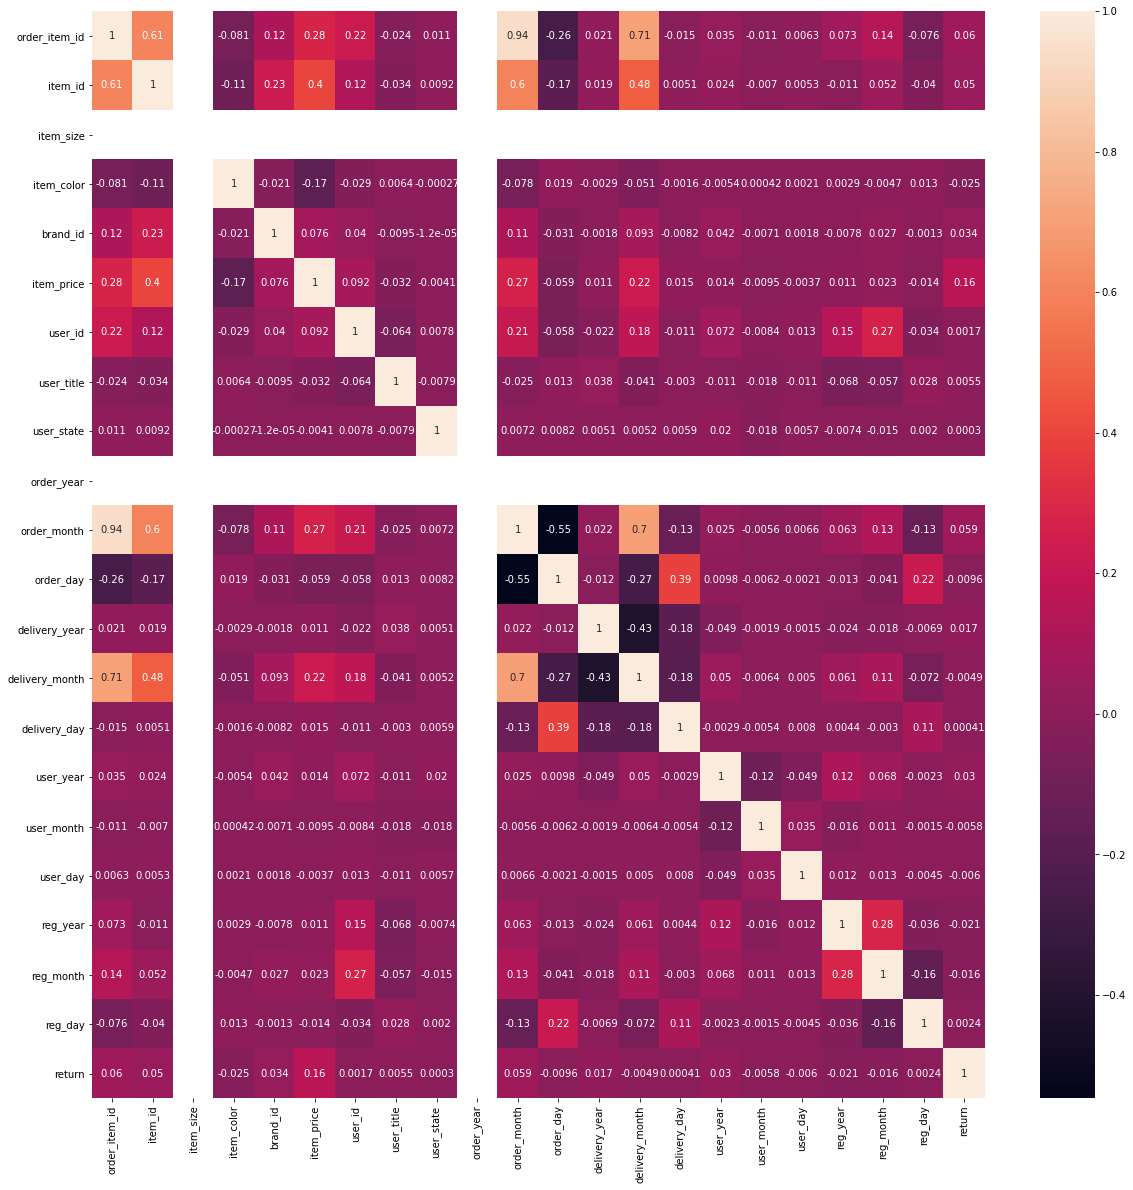

In [52]:
plt.figure(figsize=(20,20))
sns.heatmap(data_new_sqrt.corr(),annot=True)

### Analysis
- Here we can see that there is a good co-relation between item_price and return

### Checking for Multi-Colinearity

In [53]:
transformed_df = data_new_sqrt.drop('return',axis=1).copy()

In [54]:
def vif(features):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif['vif_factor'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
    vif['features']=features.columns
    
    return vif.sort_values('vif_factor')

In [55]:
vif(transformed_df)

C:\Users\ashish\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,vif_factor,features
9,0.000000,order_year
2,0.000000,item_size
8,1.001608,user_state
17,1.004166,user_day
7,1.012000,user_title
16,1.016269,user_month
3,1.032751,item_color
15,1.039037,user_year
4,1.060748,brand_id
20,1.077638,reg_day


In [56]:
dropp(transformed_df,'order_month')

#### Here we are considering which features are above 5 to be multicolinear. (We can either drop the column or treat the column and check)

#There are three features which are above 5
- order_day
- order_item_id
- order_month

In [57]:
vif(transformed_df)

C:\Users\ashish\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,vif_factor,features
9,0.000000,order_year
2,0.000000,item_size
8,1.001608,user_state
16,1.004161,user_day
7,1.011993,user_title
15,1.016021,user_month
3,1.032711,item_color
14,1.038847,user_year
4,1.060739,brand_id
19,1.075983,reg_day


### After Dropping just one feature the Multicolinearity is under control

#### Checking for the Percentage of co-relation with dependent variable.

In [58]:
def corr_with_target(df,t_col):
    independent_variables = df.drop(t_col,axis=1).columns
    corr_result=[]
    for col in independent_variables:
        corr_result.append(df[t_col].corr(df[col]))
    result = pd.DataFrame([independent_variables,corr_result],index=['Independent variables','Correlation']).T
    return result.sort_values('Correlation')

In [59]:
transformed_df = transformed_df.join(data_new_sqrt['return'],how='left')

In [60]:
transformed_df.head()

,order_item_id,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,order_year,...,delivery_year,delivery_month,delivery_day,user_year,user_month,user_day,reg_year,reg_month,reg_day,return
0,1,643,4.921938,60,5.477226,7.063993,30822,1.732051,1013,2016,...,44.899889,6.0,27.0,44.373415,4.000000,17.000000,2016,6,23,0
1,10,195,4.921938,47,6.782330,4.460942,30823,1.732051,1001,2016,...,44.899889,6.0,27.0,44.384682,4.000000,22.000000,2015,3,15,1
2,11,25,4.921938,47,2.236068,8.938680,30823,1.732051,1001,2016,...,44.899889,7.0,5.0,44.384682,4.000000,22.000000,2015,3,15,0
3,32,173,4.921938,22,4.472136,4.460942,17234,1.732051,1013,2016,...,44.899889,6.0,26.0,44.271887,1.000000,9.000000,2015,2,17,0
4,43,394,4.921938,18,6.633250,9.486833,30827,1.732051,1006,2016,...,44.899889,6.0,26.0,44.328321,6.537338,15.831159,2016,2,9,1


In [61]:
corr_with_target(transformed_df,'return')

,Independent variables,Correlation
3,item_color,-0.024504
17,reg_year,-0.021383
18,reg_month,-0.016477
10,order_day,-0.00961
16,user_day,-0.006001
15,user_month,-0.005797
12,delivery_month,-0.004904
8,user_state,0.000298
13,delivery_day,0.000407
6,user_id,0.001727


### START OF MODEL BUILDING

In [62]:
def train_and_test_split(df,t_col,testsize=0.3):
    x = df.drop(t_col,axis=1)
    y = df[t_col]
    return train_test_split(x,y,test_size=testsize,random_state=0)

In [63]:
# Model Building Function
def build_model(model_name,estimator,df,t_col):
    x_train,x_test,y_train,y_test = train_and_test_split(df,t_col)
    estimator.fit(x_train,y_train)
    y_pred = estimator.predict(x_test)
    Accuracy= accuracy_score(y_test,y_pred)
    temp = [model_name,Accuracy,y_pred]
    return temp

In [64]:
build_model('Logistic Regression',LogisticRegression(),transformed_df,'return')

['Logistic Regression',
 0.5414026017344896,
 array([0, 0, 1, ..., 0, 0, 0], dtype=int64)]

In [65]:
def multiple_models(df,t_col):
    col_names = ['Model_Name','Accuracy_Score','Predictions']
    result = pd.DataFrame(columns=col_names)
    result.loc[len(result)] = build_model('LogisticRegression',LogisticRegression(),df,t_col)
    result.loc[len(result)] = build_model('Random_forest',RandomForestClassifier(),df,t_col)
    return result

In [74]:
multiple_models(transformed_df,'return')

C:\Users\ashish\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,Model_Name,Accuracy_Score,Predictions
0,LogisticRegression,0.541403,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
1,Random_forest,0.659273,"[0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ..."


In [67]:
# Cross Validation

def k_fold_cv(x,y,fold=10):
    
    score_lr = cross_val_score(LogisticRegression(),x,y,cv=fold)
    score_RM = cross_val_score(RandomForestClassifier(),x,y,cv=fold)
    
    
    model_names=['LogisticRegression','RandomForest']
    score = [score_lr,score_RM]
    
    result = []
    
    for i in range(0,len(model_names)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_std]
        result.append(temp)
    
    
    Kfold_df = pd.DataFrame(result,columns=['model_names','score_mean','score_std'])
    return Kfold_df

In [75]:
k_fold_cv(transformed_df.drop('return',axis=1),transformed_df['return'])

,model_names,score_mean,score_std
0,LogisticRegression,0.537757,0.004703
1,RandomForest,0.660291,0.004433


# Logistic Regression gives an Accuracy of 54 %
# Random Forest gives an Accuracy of 66%

# The next step is HyperParameter tuning to check of the accuracy improves.

In [69]:
def tuning(x,y,kfold=10):
    
    # parameter Grid
    
    params_rf = param_rf = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
    
    # Hyper Parameter tuning
    tune_rf = GridSearchCV(RandomForestClassifier(),param_rf,cv=kfold)
    
    
    #Fitting x and y
    tune_rf.fit(x,y)
    
    tune = [tune_rf,]
    models = ['RF']
    
    for i in range(0,len(tune)):
        print('Model',models[i])
        print('best_parameters',tune[i].best_params_)

In [70]:
#tuning(data_new_sqrt.drop('return',axis=1),data_new_sqrt['return'])

### I did Not have Enough Computing power to Go ahead with Hyperparameter tuning.

### After HyperParameter tuning is done we get the best parameters which we use and then implement it on the Model after which the Accuracy Improves.

# Learning Curve

In [71]:
def generate_learning_curve(model_name,estimator,x,y):
    train_size,train_score,test_score=learning_curve(estimator=estimator,X=x,y=y,cv=10)
    train_score_mean=np.mean(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    plt.plot(train_size,train_score_mean,c='blue')
    plt.plot(train_size,test_score_mean,c='red')
    plt.xlabel("Samples")
    plt.ylabel("Accuracies")
    plt.title("Learning Curve for" +model_name)
    plt.legend(('Training Accuracy','Testing Accuracy'))

C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

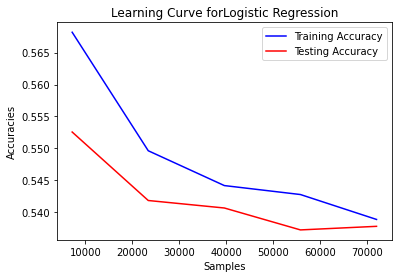

In [72]:
generate_learning_curve('Logistic Regression',LogisticRegression(),transformed_df.drop('return',axis=1),transformed_df['return'])

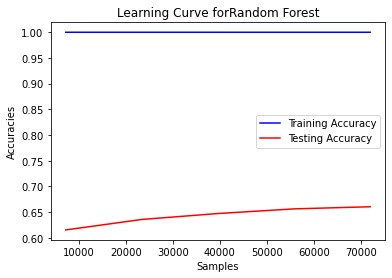

In [73]:
generate_learning_curve('Random Forest',RandomForestClassifier(),transformed_df.drop('return',axis=1),transformed_df['return'])